In [ ]:
import matplotlib.pyplot as mplt
import pandas as pd
import numpy as np
import geopandas as gpd
from functools import partial
#from tqdm import tqdm

from helper import DataHandler, Plot, plot_grid
from functools import partial

from partition import Partition, GeographicPartition
from markovchain import SingleMetricOptimizer

from markovchain import recom

from grid import Grid


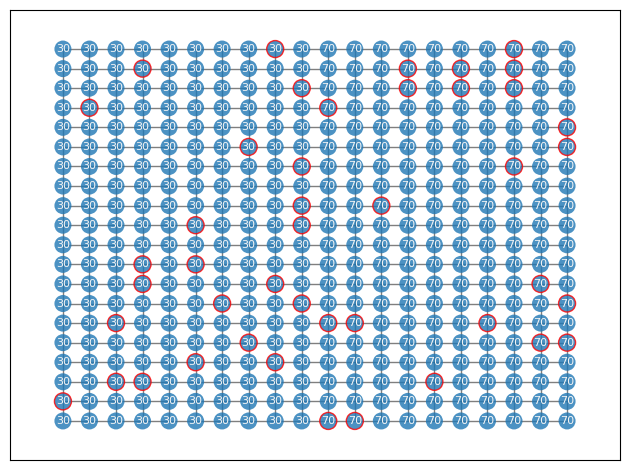

In [2]:
grid_half = Grid(dimensions=(20,20), num_candidates=50, density='opposite', threshold=(10,0))
graph_half = grid_half.graph
plot_grid(grid_half.graph)

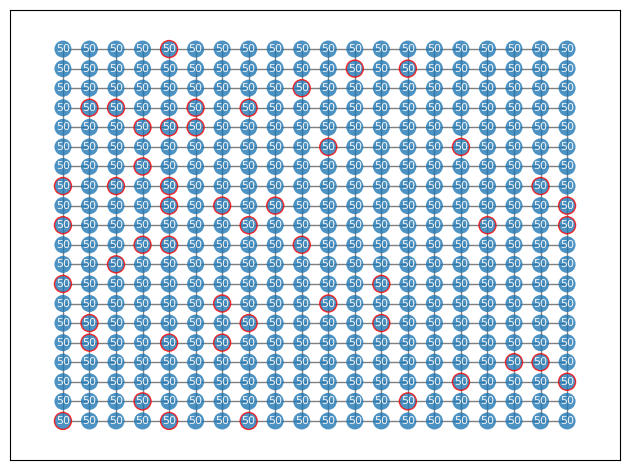

In [7]:
grid_uniform = Grid(dimensions=(20,20), num_candidates=50, density='uniform', threshold=(10,0))
graph_uniform = grid_uniform.graph
plot_grid(grid_uniform.graph)

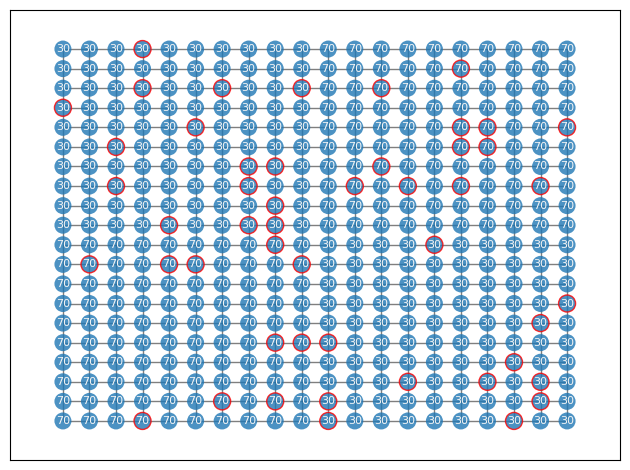

In [8]:
grid_opposite = Grid(dimensions=(20,20), num_candidates=50, density='opposite', threshold=(10,10))
graph_opposite = grid_opposite.graph
plot_grid(grid_opposite.graph)

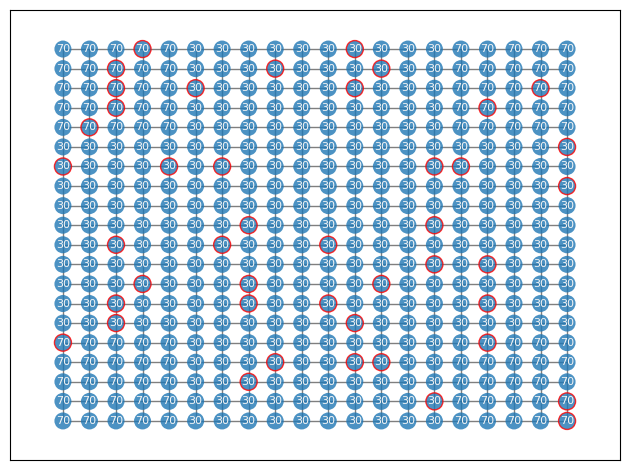

In [3]:
# if k_1 <= x <= m - k_1 or k_2 <= y <= n - k_2, then pop is 30. Here, theresold = (k_1, k_2) and dimensions=(m,n)
grid_corners = Grid(dimensions=(20,20), num_candidates=50, density='corners', threshold=(5, 5))
graph_corners = grid_corners.graph
plot_grid(grid_corners.graph)

In [6]:
import travel_time as travel

def travel_times(graph):
    candidates = {node for node in graph.nodes if graph.nodes[node]['candidate']==True}
    for u, v in graph.edges():
        graph[u][v]['time'] = 10
    travels = travel.travel_time(graph, candidates)
    return travels

travels = travel_times(graph_half)

In [5]:
"Initial partition"
pop = sum(graph.nodes[node]['population'] for node in graph.nodes)
area = sum(graph.nodes[node]['area'] for node in graph.nodes)   
#area 
#avg_density = area / pop

# nodelarin density check i burda yapilip sonuc attribute olarak atansin. Attribute ismi simdilik density

column_names = ['population', 'area', 'candidate', 'avg_density'] # avg_density attribute ata. If density is not considered, then we have to pass false.
#check_density = ?

import partition
my_updaters = {
    "population": partition.Tally(column_names[0], alias="population"),
    "cut_edges": partition.cut_edges,
    "perimeter": partition.perimeter,
    "area": partition.Tally("area", alias="area"),}

In [8]:
initial_solution = Partition.from_random_assignment(
travel_times=travels,
graph=graph,
capacity_level = 1,
epsilon=0.01,
column_names = column_names,
pop_target = pop // 4,
#density = 0.5,
updaters=my_updaters)

--------------iteration starts
remaining pop 5000
number of facility valid nodes 42
number of pop and facility valid nodes 0
only pop valid 0
ideal pop 1250.0
epsilon 0.01
root pop 5000
root facility True
complement facility valid or root 0
plus complement pop vali or root 0
--------------iteration ends
cut is empty
--------------iteration starts
remaining pop 5000
number of facility valid nodes 55
number of pop and facility valid nodes 3
only pop valid 0
ideal pop 1250.0
epsilon 0.01
root pop 5000
root facility True
complement facility valid or root 0
plus complement pop vali or root 0
--------------iteration ends
Created district 1
--------------iteration starts
remaining pop 3740
number of facility valid nodes 44
number of pop and facility valid nodes 0
only pop valid 0
ideal pop 1245.0
epsilon 0.006024096385542169
root pop 3740
root facility True
complement facility valid or root 0
plus complement pop vali or root 0
--------------iteration ends
cut is empty
--------------iteration 